# EDA

In [2]:
import pandas as pd
import pickle as pkl
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime as dt
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
plt.style.use('../fire_style.mplstyle')

In [4]:
sit_year_path = os.path.join('..', 'data', 'sit_209')
incidents_df = pd.read_csv(os.path.join(sit_year_path, "incidents.csv"), index_col=0)

| Variable Name                    | Description                                                                       |
|----------------------------------|-----------------------------------------------------------------------------------|
| **ID**                           | A unique identifier for the incident.                                             |
| **INCIDENT_IDENTIFIER**          | Another identifier for the incident.                                              |
| **INCIDENT_NUMBER**              | The number assigned to the incident : true IDENTIFIER                             |
| **DONWCGU_PROT_UNIT_IDENTIFIER** | Identifier for the protection unit.                                               |
| **INCIDENT_NAME**                | Name of the fire incident.                                                        |
| **INCTYP_IDENTIFIER**            | Type of incident, e.g., Wildfire.                                                 |
| **CAUSE_IDENTIFIER**             | Identifier for the cause of the fire.                                             |
| **DISCOVERY_DATE**               | The date and time when the incident was discovered.                               |
| **POO_LATITUDE**                 | Latitude of the Point of Origin (POO) of the fire.                                |
| **POO_LONGITUDE**                | Longitude of the POO of the fire.                                                 |
| **POO_STATE_CODE**               | The state code where the fire originated.                                         |
| **POO_CITY**                     | The city where the fire originated.                                               |
| **POO_SHORT_LOCATION_DESC**      | A short description of the fire's location.                                       |
| **POO_US_NGR_ZONE**              | U.S. National Grid (USNG) zone.                                                   |
| **POO_US_NGR_XCOORD**            | USNG X coordinate.                                                                |
| **POO_US_NGR_YCOORD**            | USNG Y coordinate.                                                                |
| **INCIDENT_AREA**                | The area covered by the incident.                                                 |
| **INC_AREA_UOM_IDENTIFIER**      | Unit of measurement for the incident area (e.g., acres, hectares).                |
| **EST_IM_COST_TO_DATE**          | Estimated incident management cost up to the current date.                        |
| **PCT_CONTAINED_COMPLETED**      | Percentage of the incident contained or completed.                                |
| **PCT_CONT_COMPL_UOM_IDENTIFIER**| Unit of measure for the containment percentage.                                   |
| **POO_COUNTY_CODE**              | County code where the fire originated.                                            |
| **SINGLE_COMPLEX_FLAG**          | Indicates if the incident is single or part of a complex.                         |
| **IRWIN_IDENTIFIER**             | Integrated Reporting of Wildland-Fire Information (IRWIN) identifier.             |
| **EXT_SYSTEM_LAST_MODIFIED_BY**  | The external system or user that last modified the entry.                         |


In [5]:
len(incidents_df)

94099

In [6]:
incidents_df["FIRECODE"].isna().mean()

0.36131095973389726

In [7]:
incidents_df["FIRECODE"].value_counts().describe()

count    56401.000000
mean         1.065584
std          0.290402
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         28.000000
Name: count, dtype: float64

## Ids

In [8]:
incidents_ids = incidents_df.loc[:, ["INCIDENT" in col for col in incidents_df.columns]].iloc[:,:3]

In [9]:
print(incidents_ids.nunique())

print(incidents_ids.isnull().sum())

INCIDENT_IDENTIFIER    94099
INCIDENT_NUMBER        23224
INCIDENT_NAME          60604
dtype: int64
INCIDENT_IDENTIFIER    0
INCIDENT_NUMBER        0
INCIDENT_NAME          4
dtype: int64


In [10]:
incidents_df["INCIDENT_IDENTIFIER"] = incidents_df["INCIDENT_IDENTIFIER"].astype("int64")

In [11]:
(incidents_df.groupby(['INCIDENT_NAME'])["INCIDENT_NUMBER"].nunique()>1)

INCIDENT_NAME
  RD.218        False
 0212 RN        False
 737 ACF        False
 89 MM 181      False
 A-1 lake       False
                ...  
whitmore        False
willow creek    False
windy bottom    False
xyz             False
zablotney       False
Name: INCIDENT_NUMBER, Length: 60604, dtype: bool

In [12]:
incidents_df.groupby(['INCIDENT_NAME'])["INCIDENT_NUMBER"].nunique()[incidents_df.groupby(['INCIDENT_NAME'])["INCIDENT_NUMBER"].nunique()>1].sample(10)

INCIDENT_NAME
Carp                2
Granite            19
EAGLE              37
Minerva             2
Mutual Dell         2
POLLOCK             2
WILDOMAR            2
Jepson              2
Leeds Assist 01     2
KIT                 2
Name: INCIDENT_NUMBER, dtype: int64

In [13]:
incidents_df[incidents_df["INCIDENT_NAME"]=="DRAGON"][["INCIDENT_IDENTIFIER", "INCIDENT_NUMBER", "INCIDENT_NAME", "DISCOVERY_DATE", "POO_LATITUDE", "POO_LONGITUDE"]]

,INCIDENT_IDENTIFIER,INCIDENT_NUMBER,INCIDENT_NAME,DISCOVERY_DATE,POO_LATITUDE,POO_LONGITUDE
2269,2733681,000093,DRAGON,2015-04-13 16:45:00,47.985278,-98.997778
8941,2817882,000075,DRAGON,2015-07-09 10:29:00,36.249900,-112.183300
13805,2905503,000326,DRAGON,2015-08-17 08:18:00,39.981100,-108.844300
34,4253029,000075,DRAGON,2015-07-09 10:29:00,36.249901,-112.183296
9350,4299635,001266,DRAGON,2016-09-13 18:43:23,32.023980,-109.997400
8936,7226201,000241,DRAGON,2017-07-19 15:39:00,39.987610,-108.845600


In [14]:
# Python code to compute pairwise relationships

df = incidents_df.copy()
keys = ['INCIDENT_IDENTIFIER', 'INCIDENT_NUMBER', 'INCIDENT_NAME', 'IRWIN_IDENTIFIER']
results = []
print(df[keys].nunique())
for i in range(len(keys)):
    for j in range(len(keys)):
        if i != j:
            group = df.groupby(keys[i])[keys[j]].nunique()
            many_to_one_count = group[group > 1].count()
            results.append((f"{keys[i]} to {keys[j]}", "many-to-one", many_to_one_count))

for result in results:
    print(f"{result[0]} has {result[1]} relationship count: {result[2]}")


INCIDENT_IDENTIFIER    94099
INCIDENT_NUMBER        23224
INCIDENT_NAME          60604
IRWIN_IDENTIFIER       88022
dtype: int64
INCIDENT_IDENTIFIER to INCIDENT_NUMBER has many-to-one relationship count: 0
INCIDENT_IDENTIFIER to INCIDENT_NAME has many-to-one relationship count: 0
INCIDENT_IDENTIFIER to IRWIN_IDENTIFIER has many-to-one relationship count: 0
INCIDENT_NUMBER to INCIDENT_IDENTIFIER has many-to-one relationship count: 7496
INCIDENT_NUMBER to INCIDENT_NAME has many-to-one relationship count: 6893
INCIDENT_NUMBER to IRWIN_IDENTIFIER has many-to-one relationship count: 6980
INCIDENT_NAME to INCIDENT_IDENTIFIER has many-to-one relationship count: 13048
INCIDENT_NAME to INCIDENT_NUMBER has many-to-one relationship count: 9690
INCIDENT_NAME to IRWIN_IDENTIFIER has many-to-one relationship count: 10400
IRWIN_IDENTIFIER to INCIDENT_IDENTIFIER has many-to-one relationship count: 5412
IRWIN_IDENTIFIER to INCIDENT_NUMBER has many-to-one relationship count: 24
IRWIN_IDENTIFIER to INCID

#### Incident Number
does not seem to make much sense

In [15]:
df.DISCOVERY_DATE = pd.to_datetime(df.DISCOVERY_DATE)
uniquedates = df.groupby('INCIDENT_NUMBER')["DISCOVERY_DATE"].nunique()
morethan2 = uniquedates[uniquedates > 1].index
df[df['INCIDENT_NUMBER'].isin(morethan2[3:4])]

,ID,INCIDENT_IDENTIFIER,INCIDENT_NUMBER,DONWCGU_PROT_UNIT_IDENTIFIER,INCIDENT_NAME,INCTYP_IDENTIFIER,CAUSE_IDENTIFIER,DISCOVERY_DATE,POO_LATITUDE,POO_LONGITUDE,...,FIRECODE,NWCG_PROT_UNIT_IDENTIFIER,LOCAL_TIMEZONE_IDENTIFIER,CY,COMPLEXITY_LEVEL_NARR,INCIDENT_COMMANDERS_NARR,COMPLEXITY_LEVEL_IDENTIFIER,UNIFIED_COMMAND_FLAG,INC_MGMT_ORG_IDENTIFIER,year
2522,2523,2734046,0000001,NaN,CO DFPC SEAT SUPPORT 2015,NaN,NaN,2015-04-15 15:00:00,39.573889,-104.915556,...,JM2E,11005392.0,NaN,2015.0,NaN,NaN,NaN,N,NaN,2015
18184,18185,2948987,0000001,NaN,LOCK 1 FIRE OCT 2015,NaN,NaN,2015-10-19 15:05:00,30.456944,-89.777500,...,J4P1,11004091.0,NaN,2015.0,NaN,NaN,NaN,N,NaN,2015
17013,17014,4378710,0000001,NaN,LARRR-FY16-WF-LIGHTING FIRE,NaN,NaN,2016-07-01 09:43:00,32.438330,-93.663889,...,KGA7,21010982.0,NaN,2016.0,NaN,NaN,NaN,N,NaN,2016
18425,18426,4440537,0000001,NaN,ARWPR-FY15-WF-RAILROAD FIRE,NaN,NaN,2015-09-09 12:00:00,35.361900,-90.252860,...,KGA8,21014014.0,NaN,2016.0,NaN,NaN,NaN,N,NaN,2016
991,992,9015697,0000001,7471051.0,CPI 7,NaN,7483985.0,2018-03-03 12:00:00,26.285280,-81.016670,...,LLJ1,21039445.0,7484136.0,2018.0,NaN,"Lee Kemp, Seminole Tribe of Florida",7483837.0,N,7484006.0,2018
1132,1133,9012548,0000001,NaN,HOSPITAL RIDGE,NaN,NaN,2018-01-02 14:14:00,41.047778,-123.680000,...,LJ53,21039772.0,NaN,2018.0,NaN,NaN,NaN,N,NaN,2018


## Missing values

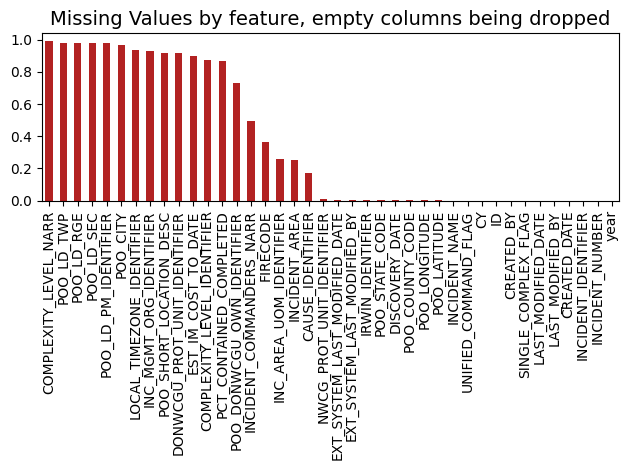

In [16]:
miss_pct = incidents_df.isna().mean()
miss_pct[miss_pct<0.99].sort_values(ascending=False).T.plot(kind="bar", title="Missing Values by feature, empty columns being dropped")
plt.xticks(rotation=90)
plt.tight_layout()

In [17]:
columns_to_drop = miss_pct[miss_pct>0.99].index
incidents_df.drop(columns_to_drop, axis=1, inplace=True)

In [18]:
incidents_df.isna

<bound method DataFrame.isna of           ID  INCIDENT_IDENTIFIER INCIDENT_NUMBER  \
0          1              1193142          150013   
1          2              1193141          150012   
2          3              1193176          000001   
3          4              1193144          150015   
4          5              1156523          140140   
...      ...                  ...             ...   
24771  24772              9249045          000078   
24772  24773              9249046          001021   
24773  24774              9249047          000141   
24774  24775              9249048          020124   
24775  24776              9249049          000204   

       DONWCGU_PROT_UNIT_IDENTIFIER     INCIDENT_NAME  CAUSE_IDENTIFIER  \
0                               NaN  BIA SUPPORT 2015               NaN   
1                               NaN  FWS SUPPORT 2015               NaN   
2                               NaN            SOQUEL               NaN   
3                              

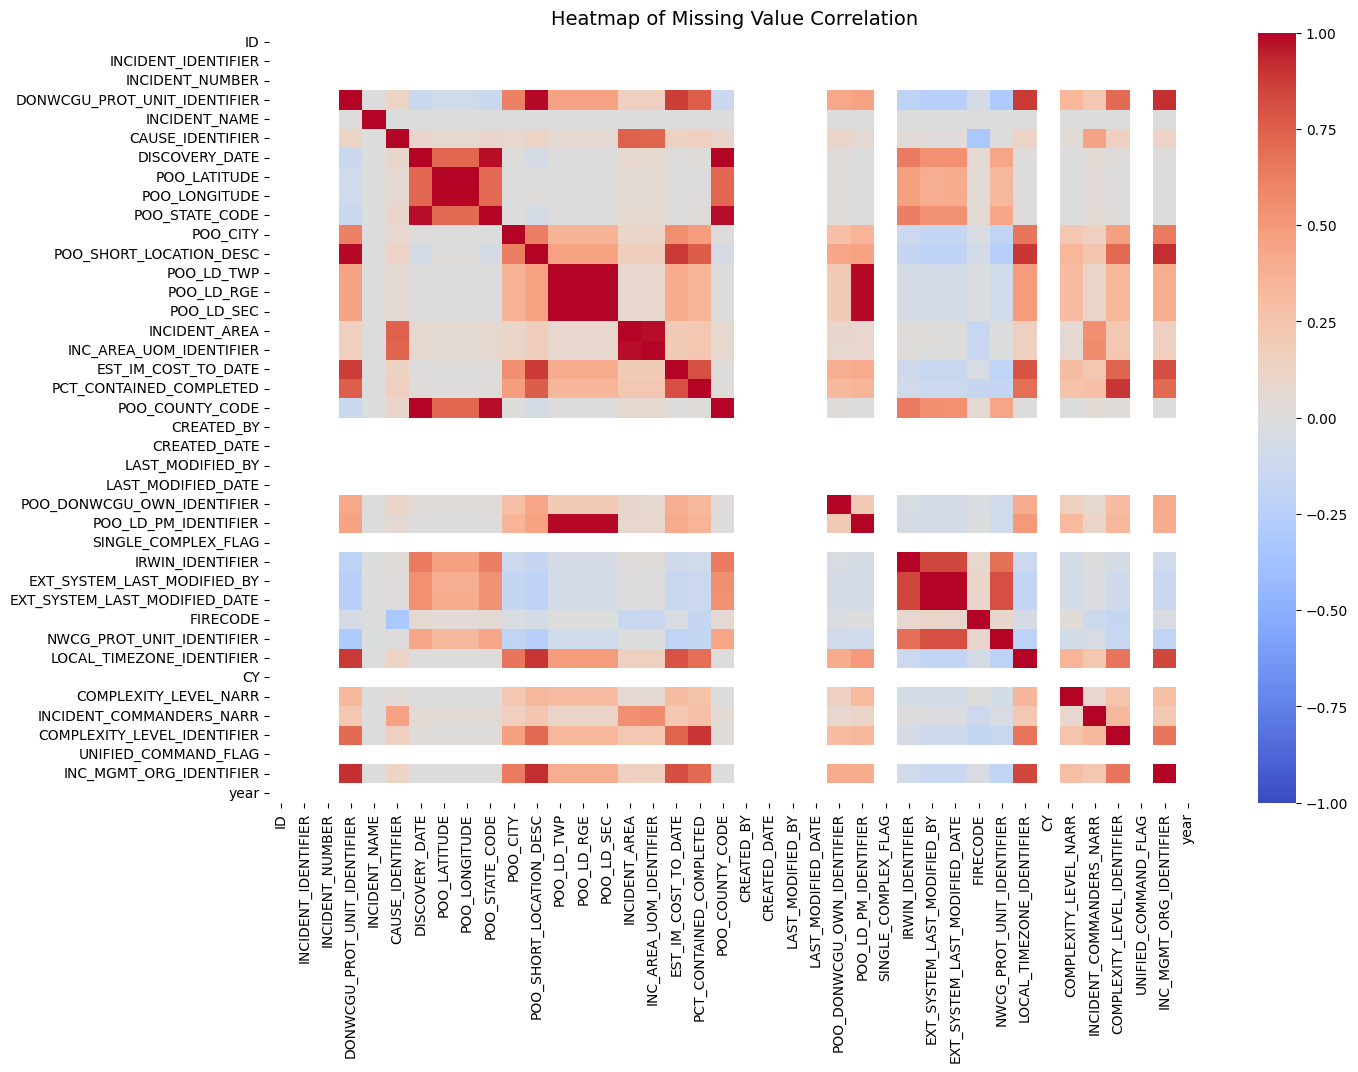

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
missing_indicator = incidents_df.isnull().astype(int)

# Calculate the correlation matrix for the indicator dataframe
missing_corr = missing_indicator.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(missing_corr, vmin=-1, vmax=1, cmap='coolwarm', annot=False)
plt.title('Heatmap of Missing Value Correlation')
plt.show()

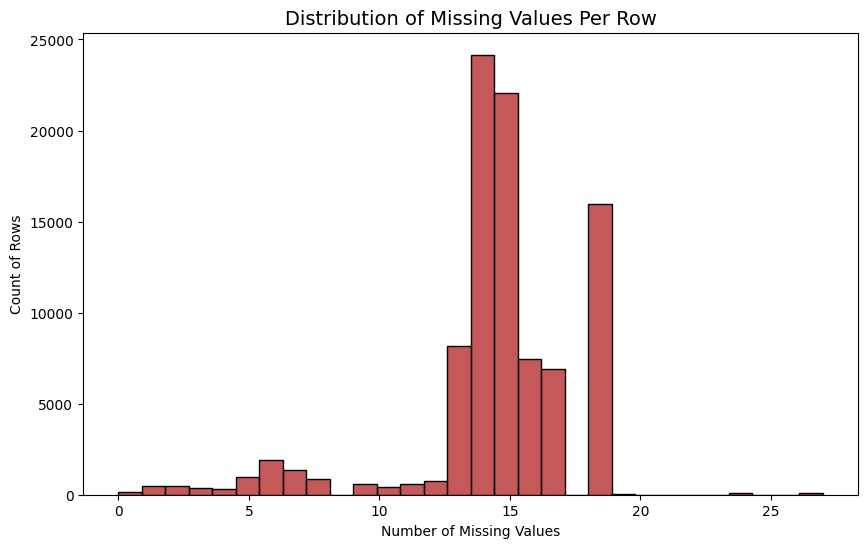

count    94099.000000
mean        14.513151
std          3.184048
min          0.000000
25%         14.000000
50%         15.000000
75%         16.000000
max         27.000000
dtype: float64

In [20]:
missing_per_row = incidents_df.isnull().sum(axis=1)

# Plot the distribution of missing values per row
plt.figure(figsize=(10, 6))
sns.histplot(missing_per_row, bins=30, kde=False)
plt.title('Distribution of Missing Values Per Row')
plt.xlabel('Number of Missing Values')
plt.ylabel('Count of Rows')
plt.show()

# Display basic statistics about missing values per row
missing_per_row.describe()

In [21]:
incidents_df.to_csv("../data/sit_209/preprocessed/incidents.csv")

In [22]:
incidents_df.head()

,ID,INCIDENT_IDENTIFIER,INCIDENT_NUMBER,DONWCGU_PROT_UNIT_IDENTIFIER,INCIDENT_NAME,CAUSE_IDENTIFIER,DISCOVERY_DATE,POO_LATITUDE,POO_LONGITUDE,POO_STATE_CODE,...,FIRECODE,NWCG_PROT_UNIT_IDENTIFIER,LOCAL_TIMEZONE_IDENTIFIER,CY,COMPLEXITY_LEVEL_NARR,INCIDENT_COMMANDERS_NARR,COMPLEXITY_LEVEL_IDENTIFIER,UNIFIED_COMMAND_FLAG,INC_MGMT_ORG_IDENTIFIER,year
0,1,1193142,150013,NaN,BIA SUPPORT 2015,NaN,2015-01-02 10:15:00,44.411111,-98.486389,46.0,...,JG9K,5781.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015
1,2,1193141,150012,NaN,FWS SUPPORT 2015,NaN,2015-01-02 10:12:00,44.361944,-98.217500,46.0,...,JG9J,3313.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015
2,3,1193176,000001,NaN,SOQUEL,NaN,2015-01-01 15:45:00,37.384444,-119.555000,6.0,...,JG9S,2391.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015
3,4,1193144,150015,NaN,WCP FAL 2015,NaN,2015-01-02 10:17:00,43.555833,-103.478611,46.0,...,JG9M,6966.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015
4,5,1156523,140140,NaN,FONTANA,87.0,2014-11-22 10:18:00,35.423333,-83.801389,37.0,...,JGV1,4592.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015


## Spatial information
Motivation :
* geographic/climatologic features
* used for optimization allocation
* matching with geosptial metadata

In [23]:
spatial_cols = ["POO" in col for col in incidents_df.columns]

print(incidents_df.loc[:, spatial_cols].columns)
incidents_df.loc[:, spatial_cols].isna().mean()

Index(['POO_LATITUDE', 'POO_LONGITUDE', 'POO_STATE_CODE', 'POO_CITY',
       'POO_SHORT_LOCATION_DESC', 'POO_LD_TWP', 'POO_LD_RGE', 'POO_LD_SEC',
       'POO_COUNTY_CODE', 'POO_DONWCGU_OWN_IDENTIFIER',
       'POO_LD_PM_IDENTIFIER'],
      dtype='object')


POO_LATITUDE                  0.000946
POO_LONGITUDE                 0.000946
POO_STATE_CODE                0.001817
POO_CITY                      0.966216
POO_SHORT_LOCATION_DESC       0.917002
POO_LD_TWP                    0.981551
POO_LD_RGE                    0.981551
POO_LD_SEC                    0.981530
POO_COUNTY_CODE               0.001753
POO_DONWCGU_OWN_IDENTIFIER    0.732601
POO_LD_PM_IDENTIFIER          0.981190
dtype: float64

In [24]:
incidents_df[["POO_LATITUDE", "POO_LONGITUDE"]].duplicated().mean()

0.04188142275688371

<Axes: xlabel='POO_LONGITUDE', ylabel='POO_LATITUDE'>

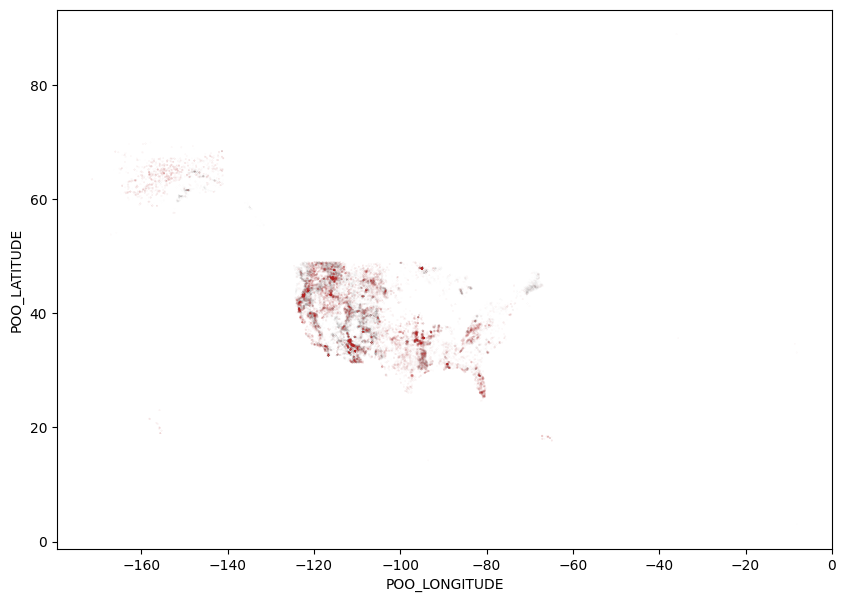

In [25]:
df.plot(kind="scatter", x="POO_LONGITUDE", y="POO_LATITUDE", s=2*np.sqrt(df["INCIDENT_AREA"].values)/np.nanmax(np.sqrt(df["INCIDENT_AREA"].values)), alpha=0.2, figsize=(10,7))

## Categorical data

In [26]:
df = incidents_df.copy().loc[:, ["POO" not in col for col in incidents_df.columns]]

In [27]:
df["SQRT_AREA"] = np.sqrt(df["INCIDENT_AREA"])

In [28]:
from ipywidgets import interact

In [29]:
cat_cols = df.loc[:, df.dtypes=="object"].columns

In [30]:
df.columns

Index(['ID', 'INCIDENT_IDENTIFIER', 'INCIDENT_NUMBER',
       'DONWCGU_PROT_UNIT_IDENTIFIER', 'INCIDENT_NAME', 'CAUSE_IDENTIFIER',
       'DISCOVERY_DATE', 'INCIDENT_AREA', 'INC_AREA_UOM_IDENTIFIER',
       'EST_IM_COST_TO_DATE', 'PCT_CONTAINED_COMPLETED', 'CREATED_BY',
       'CREATED_DATE', 'LAST_MODIFIED_BY', 'LAST_MODIFIED_DATE',
       'SINGLE_COMPLEX_FLAG', 'IRWIN_IDENTIFIER',
       'EXT_SYSTEM_LAST_MODIFIED_BY', 'EXT_SYSTEM_LAST_MODIFIED_DATE',
       'FIRECODE', 'NWCG_PROT_UNIT_IDENTIFIER', 'LOCAL_TIMEZONE_IDENTIFIER',
       'CY', 'COMPLEXITY_LEVEL_NARR', 'INCIDENT_COMMANDERS_NARR',
       'COMPLEXITY_LEVEL_IDENTIFIER', 'UNIFIED_COMMAND_FLAG',
       'INC_MGMT_ORG_IDENTIFIER', 'year', 'SQRT_AREA'],
      dtype='object')

Missing values: 0.1681633173572514%

Unique values: 17
Unique value per year: 6 
Unique value per year: 7 
Unique value per year: 5 
Unique value per year: 7 

                     count          mean           std   min        25%  \
CAUSE_IDENTIFIER  78275.0  4.411669e+06  2.167679e+06  87.0  2990063.0   

                        50%        75%        max  
CAUSE_IDENTIFIER  4496045.0  7483985.0  7483988.0  

 CAUSE_IDENTIFIER
7483985.0    0.125941
4496045.0    0.125008
2990063.0    0.113791
4496048.0    0.085430
4496046.0    0.085391
1536118.0    0.084727
7483988.0    0.078390
7483986.0    0.074379
1536117.0    0.074111
2990064.0    0.071530
2990066.0    0.046618
1536120.0    0.033229
7483987.0    0.000575
4496047.0    0.000562
1536119.0    0.000217
87.0         0.000089
2990065.0    0.000013
Name: proportion, dtype: float64


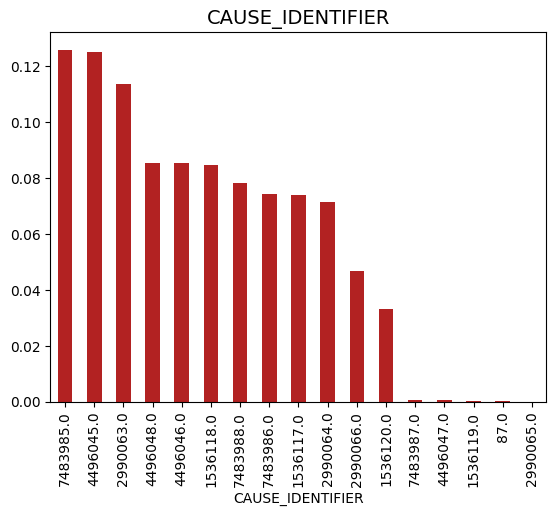

In [31]:
def show_one_col(col):
    print(f"Missing values: {df[col].isna().mean()}%\n")
    print(f"Unique values: {df[col].nunique()}")
    for year in range(2015,2019):
        nu = df[col][df["year"]==year].nunique()
        print(f"Unique value per year: {nu} ")
    print("\n", df[col].describe().to_frame().T)
    print("\n", df[col].value_counts(10))
    return df[col].value_counts(10).plot(kind="bar",title=col)

show_one_col("CAUSE_IDENTIFIER");

In [32]:
df.groupby("CAUSE_IDENTIFIER")["year"].nunique()

CAUSE_IDENTIFIER
87.0         1
1536117.0    2
1536118.0    2
1536119.0    1
1536120.0    2
2990063.0    3
2990064.0    1
2990065.0    1
2990066.0    1
4496045.0    2
4496046.0    2
4496047.0    1
4496048.0    2
7483985.0    1
7483986.0    1
7483987.0    1
7483988.0    1
Name: year, dtype: int64

In [33]:
df[df["year"]==2015].groupby("CAUSE_IDENTIFIER")[["EST_IM_COST_TO_DATE", "INCIDENT_AREA"]].mean()

,EST_IM_COST_TO_DATE,INCIDENT_AREA
CAUSE_IDENTIFIER,,
87.0,5.000000e+04,291.500000
1536117.0,2.993516e+05,182.968384
1536118.0,1.540824e+06,1501.740485
1536119.0,4.511957e+04,536.076471
1536120.0,2.338933e+06,894.676166
2990063.0,5.703600e+04,1.666667


In [34]:
causes = {
    7483986: 1, 7483985: 2, 7483987: 3, 7483988: 4,
    4496046: 1, 4496045: 2, 4496047: 3, 4496048: 4,
    2990064: 1, 2990063: 2, 2990065: 3, 2990066: 4,
    1536118: 1, 1536117: 2, 1536119: 3, 1536120: 4,
    87:5
}


In [35]:
df_new_causes = df.copy()
df_new_causes.loc[df['CAUSE_IDENTIFIER'].notna(), 'cause_id'] = df[df['CAUSE_IDENTIFIER'].notna()]['CAUSE_IDENTIFIER'].astype(int).apply(lambda x: causes[x]).astype(int)


In [36]:
df_new_causes.value_counts("cause_id")

cause_id
2.0    34351
1.0    24737
4.0    19073
3.0      107
5.0        7
Name: count, dtype: int64

In [49]:
df_new_causes['cause_id']

0              NaN
1              NaN
2              NaN
3              NaN
4             87.0
           ...    
24771    7483986.0
24772    7483985.0
24773    7483988.0
24774    7483985.0
24775    7483986.0
Name: CAUSE_IDENTIFIER, Length: 94099, dtype: float64

In [38]:
df_new_causes.to_csv("../data/sit_209/preprocessed/incidents.csv")

In [39]:
df_new_causes.columns

Index(['ID', 'INCIDENT_IDENTIFIER', 'INCIDENT_NUMBER',
       'DONWCGU_PROT_UNIT_IDENTIFIER', 'INCIDENT_NAME', 'CAUSE_IDENTIFIER',
       'DISCOVERY_DATE', 'INCIDENT_AREA', 'INC_AREA_UOM_IDENTIFIER',
       'EST_IM_COST_TO_DATE', 'PCT_CONTAINED_COMPLETED', 'CREATED_BY',
       'CREATED_DATE', 'LAST_MODIFIED_BY', 'LAST_MODIFIED_DATE',
       'SINGLE_COMPLEX_FLAG', 'IRWIN_IDENTIFIER',
       'EXT_SYSTEM_LAST_MODIFIED_BY', 'EXT_SYSTEM_LAST_MODIFIED_DATE',
       'FIRECODE', 'NWCG_PROT_UNIT_IDENTIFIER', 'LOCAL_TIMEZONE_IDENTIFIER',
       'CY', 'COMPLEXITY_LEVEL_NARR', 'INCIDENT_COMMANDERS_NARR',
       'COMPLEXITY_LEVEL_IDENTIFIER', 'UNIFIED_COMMAND_FLAG',
       'INC_MGMT_ORG_IDENTIFIER', 'year', 'SQRT_AREA', 'cause_id'],
      dtype='object')

In [40]:
df_new_causes['INC_AREA_UOM_IDENTIFIER'].value_counts()

INC_AREA_UOM_IDENTIFIER
4496037.0    20062
7483977.0    19352
2990055.0    17037
1536109.0    13217
4496040.0       11
7483980.0        4
20928.0          1
1536112.0        1
2990058.0        1
Name: count, dtype: int64

In [41]:
df_new_causes[df_new_causes['INCIDENT_IDENTIFIER']==2880290]

,ID,INCIDENT_IDENTIFIER,INCIDENT_NUMBER,DONWCGU_PROT_UNIT_IDENTIFIER,INCIDENT_NAME,CAUSE_IDENTIFIER,DISCOVERY_DATE,INCIDENT_AREA,INC_AREA_UOM_IDENTIFIER,EST_IM_COST_TO_DATE,...,LOCAL_TIMEZONE_IDENTIFIER,CY,COMPLEXITY_LEVEL_NARR,INCIDENT_COMMANDERS_NARR,COMPLEXITY_LEVEL_IDENTIFIER,UNIFIED_COMMAND_FLAG,INC_MGMT_ORG_IDENTIFIER,year,SQRT_AREA,cause_id
16293,16294,2880290,000889,1524977.0,SODA,1536120.0,2015-08-10 14:10:00,279144.0,1536109.0,6250000.0,...,1536272.0,2015.0,NaN,N. BUDD,1535970.0,N,1536137.0,2015,528.340799,4.0


In [42]:
df_new_causes[df_new_causes['INCIDENT_IDENTIFIER']==4254800]

,ID,INCIDENT_IDENTIFIER,INCIDENT_NUMBER,DONWCGU_PROT_UNIT_IDENTIFIER,INCIDENT_NAME,CAUSE_IDENTIFIER,DISCOVERY_DATE,INCIDENT_AREA,INC_AREA_UOM_IDENTIFIER,EST_IM_COST_TO_DATE,...,LOCAL_TIMEZONE_IDENTIFIER,CY,COMPLEXITY_LEVEL_NARR,INCIDENT_COMMANDERS_NARR,COMPLEXITY_LEVEL_IDENTIFIER,UNIFIED_COMMAND_FLAG,INC_MGMT_ORG_IDENTIFIER,year,SQRT_AREA,cause_id
668,669,4254800,000889,NaN,SODA,2990066.0,2015-08-10 14:10:00,279144.0,2990055.0,6250000.0,...,NaN,2016.0,NaN,N. BUDD,2989916.0,N,NaN,2016,528.340799,4.0


## Duplicates

In [43]:
duplicated = df[df[['INCIDENT_NAME', 'DISCOVERY_DATE']].duplicated(keep=False)]

In [44]:
duplicated

,ID,INCIDENT_IDENTIFIER,INCIDENT_NUMBER,DONWCGU_PROT_UNIT_IDENTIFIER,INCIDENT_NAME,CAUSE_IDENTIFIER,DISCOVERY_DATE,INCIDENT_AREA,INC_AREA_UOM_IDENTIFIER,EST_IM_COST_TO_DATE,...,NWCG_PROT_UNIT_IDENTIFIER,LOCAL_TIMEZONE_IDENTIFIER,CY,COMPLEXITY_LEVEL_NARR,INCIDENT_COMMANDERS_NARR,COMPLEXITY_LEVEL_IDENTIFIER,UNIFIED_COMMAND_FLAG,INC_MGMT_ORG_IDENTIFIER,year,SQRT_AREA
2,3,1193176,000001,NaN,SOQUEL,NaN,2015-01-01 15:45:00,NaN,NaN,NaN,...,2391.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,NaN
4,5,1156523,140140,NaN,FONTANA,87.0,2014-11-22 10:18:00,5.0,NaN,NaN,...,4592.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,2.236068
5,6,1137166,140133,NaN,Fort Hill,87.0,2014-11-07 14:00:00,1.0,NaN,NaN,...,4592.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,1.000000
6,7,1179371,140147,NaN,PERCY CREEK,87.0,2014-12-13 13:15:00,NaN,NaN,NaN,...,4592.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,NaN
7,8,1186695,003870,NaN,CNF 099 GLASSHILL,87.0,2014-12-21 17:00:00,NaN,NaN,NaN,...,1576.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24728,24729,9257766,000239,NaN,FLATLANDER,7483985.0,2016-05-31 17:10:00,86.0,7483977.0,175000.0,...,21036592.0,NaN,2018.0,NaN,HALL - TYPE 4,7483837.0,N,NaN,2018,9.273618
24743,24744,9249017,001196,NaN,SS CASINO,7483985.0,2018-03-16 16:34:00,1500.0,7483977.0,NaN,...,21037571.0,NaN,2018.0,NaN,NaN,NaN,N,NaN,2018,38.729833
24744,24745,9249018,001196,NaN,SS CASINO,7483985.0,2018-03-16 16:34:00,1500.0,7483977.0,NaN,...,21037571.0,NaN,2018.0,NaN,NaN,NaN,N,NaN,2018,38.729833
24745,24746,9249019,001196,NaN,SS CASINO,7483985.0,2018-03-16 16:34:00,1500.0,7483977.0,NaN,...,21037571.0,NaN,2018.0,NaN,NaN,NaN,N,NaN,2018,38.729833


In [45]:
duplicated = df[df[['INCIDENT_NUMBER', 'INCIDENT_NAME']].duplicated(keep=False)]
duplicated

,ID,INCIDENT_IDENTIFIER,INCIDENT_NUMBER,DONWCGU_PROT_UNIT_IDENTIFIER,INCIDENT_NAME,CAUSE_IDENTIFIER,DISCOVERY_DATE,INCIDENT_AREA,INC_AREA_UOM_IDENTIFIER,EST_IM_COST_TO_DATE,...,NWCG_PROT_UNIT_IDENTIFIER,LOCAL_TIMEZONE_IDENTIFIER,CY,COMPLEXITY_LEVEL_NARR,INCIDENT_COMMANDERS_NARR,COMPLEXITY_LEVEL_IDENTIFIER,UNIFIED_COMMAND_FLAG,INC_MGMT_ORG_IDENTIFIER,year,SQRT_AREA
2,3,1193176,000001,NaN,SOQUEL,NaN,2015-01-01 15:45:00,NaN,NaN,NaN,...,2391.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,NaN
4,5,1156523,140140,NaN,FONTANA,87.0,2014-11-22 10:18:00,5.0,NaN,NaN,...,4592.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,2.236068
5,6,1137166,140133,NaN,Fort Hill,87.0,2014-11-07 14:00:00,1.0,NaN,NaN,...,4592.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,1.000000
6,7,1179371,140147,NaN,PERCY CREEK,87.0,2014-12-13 13:15:00,NaN,NaN,NaN,...,4592.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,NaN
7,8,1186695,003870,NaN,CNF 099 GLASSHILL,87.0,2014-12-21 17:00:00,NaN,NaN,NaN,...,1576.0,NaN,2014.0,NaN,NaN,NaN,N,NaN,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24728,24729,9257766,000239,NaN,FLATLANDER,7483985.0,2016-05-31 17:10:00,86.0,7483977.0,175000.0,...,21036592.0,NaN,2018.0,NaN,HALL - TYPE 4,7483837.0,N,NaN,2018,9.273618
24743,24744,9249017,001196,NaN,SS CASINO,7483985.0,2018-03-16 16:34:00,1500.0,7483977.0,NaN,...,21037571.0,NaN,2018.0,NaN,NaN,NaN,N,NaN,2018,38.729833
24744,24745,9249018,001196,NaN,SS CASINO,7483985.0,2018-03-16 16:34:00,1500.0,7483977.0,NaN,...,21037571.0,NaN,2018.0,NaN,NaN,NaN,N,NaN,2018,38.729833
24745,24746,9249019,001196,NaN,SS CASINO,7483985.0,2018-03-16 16:34:00,1500.0,7483977.0,NaN,...,21037571.0,NaN,2018.0,NaN,NaN,NaN,N,NaN,2018,38.729833


In [46]:
len(duplicated)

13157

In [47]:
duplicated.groupby('INCIDENT_NAME')['DISCOVERY_DATE'].nunique().value_counts()

DISCOVERY_DATE
1     4109
2      905
3      443
4       49
5       21
6        7
8        3
7        2
0        1
11       1
10       1
20       1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

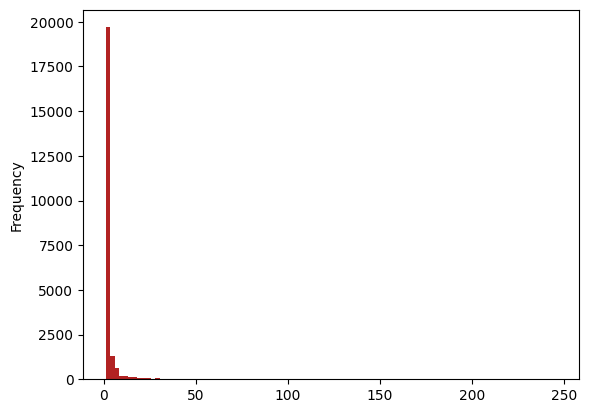

In [48]:
df['INCIDENT_NUMBER'].value_counts().plot(kind="hist", bins=100)